In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Circle

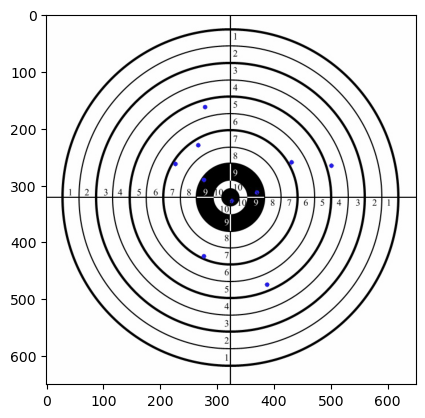

In [7]:
# анхны зураг үүн дээр тэмдэглэгээ хийнэ.
image = cv2.imread('target.jpg')
# үүгээр боловсруулалт хийгдэнэ 
ready_image = image.copy()


plt.imshow(image)
plt.show()

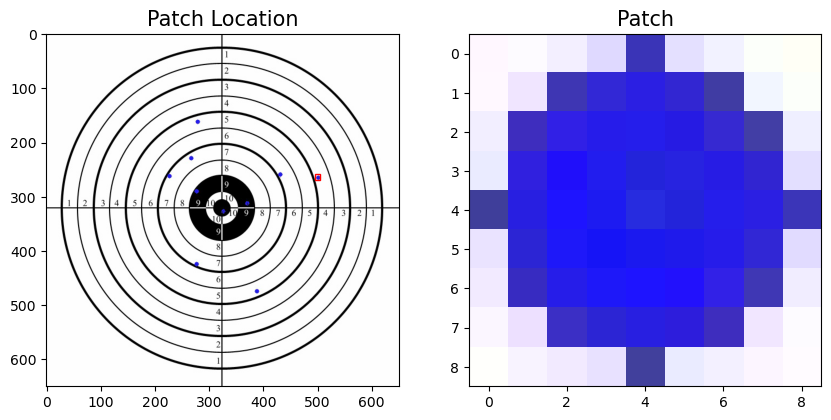

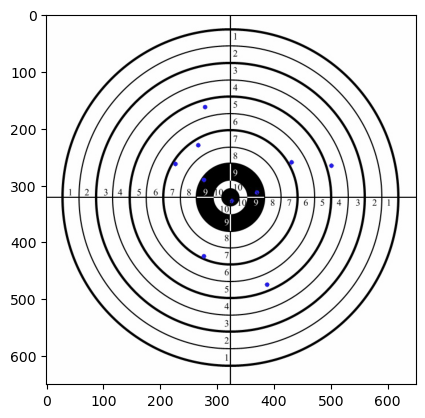

In [8]:
from matplotlib.patches import Rectangle


fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(image,cmap='gray')
ax[0].add_patch(Rectangle((495, 258), 10, 10, edgecolor='r', facecolor='none'));
ax[0].set_title('Patch Location',fontsize=15)


#  цэг тэмплэт олох x1,y1, x2,y2
patch = image[262:271, 497:506]
ax[1].imshow(patch,cmap='gray')

# Энэ patch дээр цэнхэр цэгийг тойрон цагаан пиксэлүүд байгаа
# хэрвээ бид тухайн цэнхэр цэгийг тойрсон өөр өнгө орсон пиксэлүүд байгаа тохиолдолд patch олдохгүй болно
# тиймээс зургийг эхлээд филтэр хийх хэрэгтэй
ax[1].set_title('Patch',fontsize=15)


plt.show()
plt.imshow(image)
plt.show()


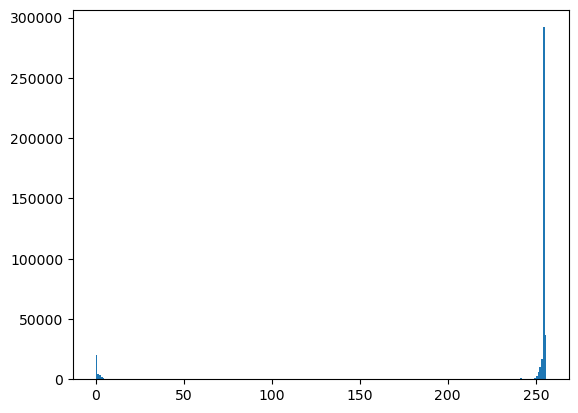

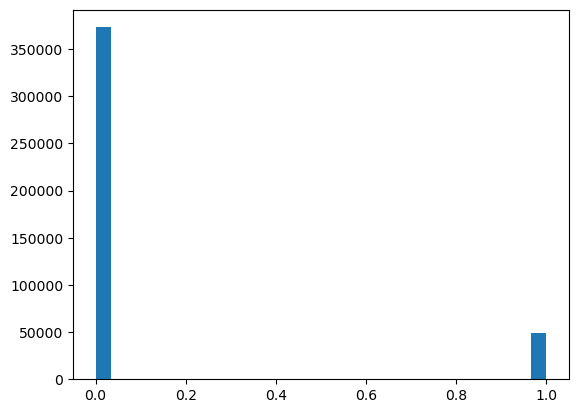

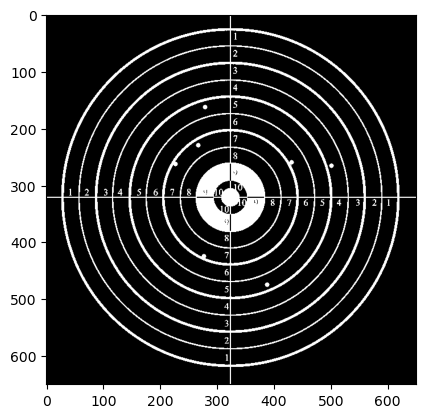

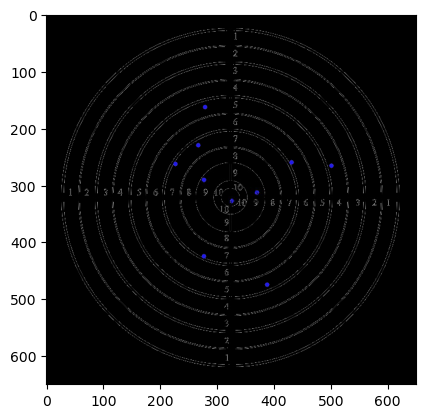

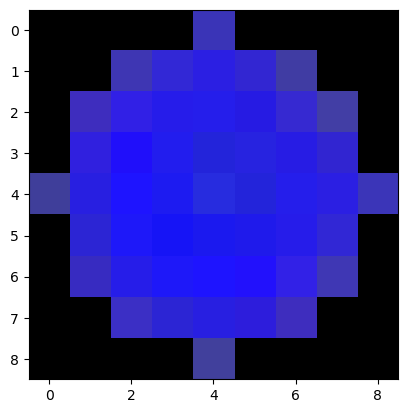

In [9]:
# Зургийг саарал болгосон
gray = cv2.cvtColor(ready_image, cv2.COLOR_BGR2GRAY)
plt.hist(gray.ravel(),256,[0,256])
plt.show()

# 200 аас бага утгатай байгаа утгуудийг 0 их утгуудын 1 болгосон хоёртын маск зураг (хэрвээ 200 > фиксл = False үгүй бол True )
b_mask = gray < 200
plt.hist(b_mask.ravel(),30,[0,1])
plt.show()
plt.imshow(b_mask, cmap="gray")
plt.show()

# зурагын 200с их утгийг олсон маскаар филтэр хийж утгуудыг 0 болгосон.
ready_image[~b_mask] = 0
# зурагаас тэмплайт олоход бэлэн болгосон
plt.imshow(ready_image)
plt.show()

ready_patch = ready_image[262:271, 497:506]

plt.imshow(ready_patch)
plt.show()

Олдсон тэмплайтын тоо: 10


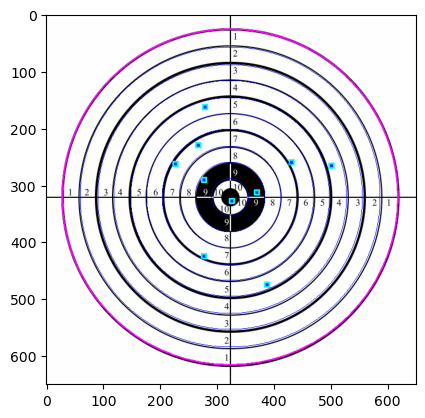

Нийт оноо: 69
[ 4  5  5  6  7  7  7  9  9 10]


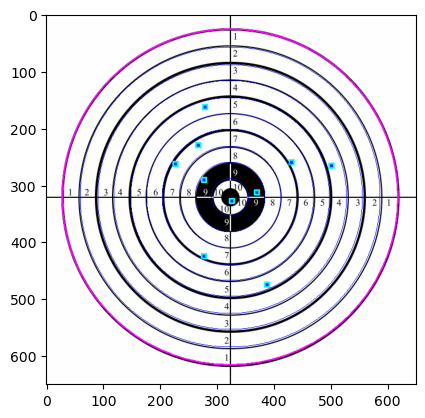

In [10]:
res = cv2.matchTemplate(ready_image, ready_patch, cv2.TM_CCOEFF_NORMED)
loc = np.where(res >= 0.5)

#            zip(*loc[::-1]) нь утгуудыг 2, 2 оор нийлүүлж (x, y) цэг гаргаж авсан
for point in zip(*loc[::-1]):
    cv2.rectangle(image, point, (point[0] + 8, point[1] + 8), (0, 255, 255), 1)
# тэмплайт матч хийсэн зурагуудаас contour олж хэдэн зураг байгааг гаргасан
contours, _ = cv2.findContours((res >= 0.5).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Олдсон тэмплайтын тоо: {}".format(len(contours)))
# байнуудын тойргийн радиусуудыг олох (гараар олсон)
#         ( зураг (тоиргийн_төв),радиус,өнгө,өргөн)
cv2.circle(image,[323,321],33,(0,0,255),1)
cv2.circle(image,[323,321],62,(0,0,255),1)
cv2.circle(image,[323,321],90,(0,0,255),1)
cv2.circle(image,[323,321],120,(0,0,255),1)
cv2.circle(image,[323,321],147,(0,0,255),1)
cv2.circle(image,[323,321],175,(0,0,255),1)
cv2.circle(image,[323,321],205,(0,0,255),1)
cv2.circle(image,[323,321],233,(0,0,255),1)
cv2.circle(image,[323,321],264,(0,0,255),1)
cv2.circle(image,[323,321],295,(255,0,255),2)
plt.imshow(image)
plt.show()


distances = [];
#  цэгийн төв аль тойрогт багтаж байгааг тодорхойлох r1<sqrt(x^2+y^2)<r2
for i,pt in enumerate(contours):
    p = pt[0][0] # contours оос өгсөн зураг бүр дэх цэгийн дарааллаас эхний цэг дэх утгуудыг авсан. энэ нь ийм хэлбэртэй = (x, у)
    cv2.circle(gray,[p[0], p[1]],4,(255,0,0),1)
    distance = cv2.pointPolygonTest(np.array([(324,321)]), pt= tuple([int(round(p[0]) ), int(round( p[1] )) ]), measureDist = True)
    distances.append(distance)

# оноо тоолох
points = []
point_ranges = [(295, 264, 1), 
                (264, 233, 2), 
                (233, 205, 3), 
                (205, 175, 4), 
                (175, 147, 5),
                (147, 120, 6), 
                (120, 90, 7), 
                (90, 64, 8), 
                (64, 32, 9), 
                (32, 0, 10)
                ]

for distance in distances:
    g = -distance
    for start, end, point in point_ranges:
        if g >= end and g < start:
            points.append(point)
            break
    else:
        points.append(0)


# авсан оноог тоолж нийлбэрийг хэвлэх 64 оноо  ---- багшийн тоолсон оноо.
# нийт 10 цэг нийлээд 69 оноо болж байна.

print("Нийт оноо: {}".format(np.sum(points)))
print(np.sort(points))
plt.imshow(image)
plt.show()